In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import openpyxl

## Figure 1

<ipython-input-5-3d0c7b6fa1b8>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(ax=axs[0, 0], x='Algorithm', y='pLDDT', data=Px_mean_NIS, palette=tol_colors, dodge=False)
<ipython-input-5-3d0c7b6fa1b8>:12: UserWarning: The palette list has more values (9) than needed (7), which may not be intended.
  sns.violinplot(ax=axs[0, 0], x='Algorithm', y='pLDDT', data=Px_mean_NIS, palette=tol_colors, dodge=False)
<ipython-input-5-3d0c7b6fa1b8>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0, 0].set_xticklabels(axs[0,0].get_xticklabels(), fontsize=12, rotation=30, ha='right')
<ipython-input-5-3d0c7b6fa1b8>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set

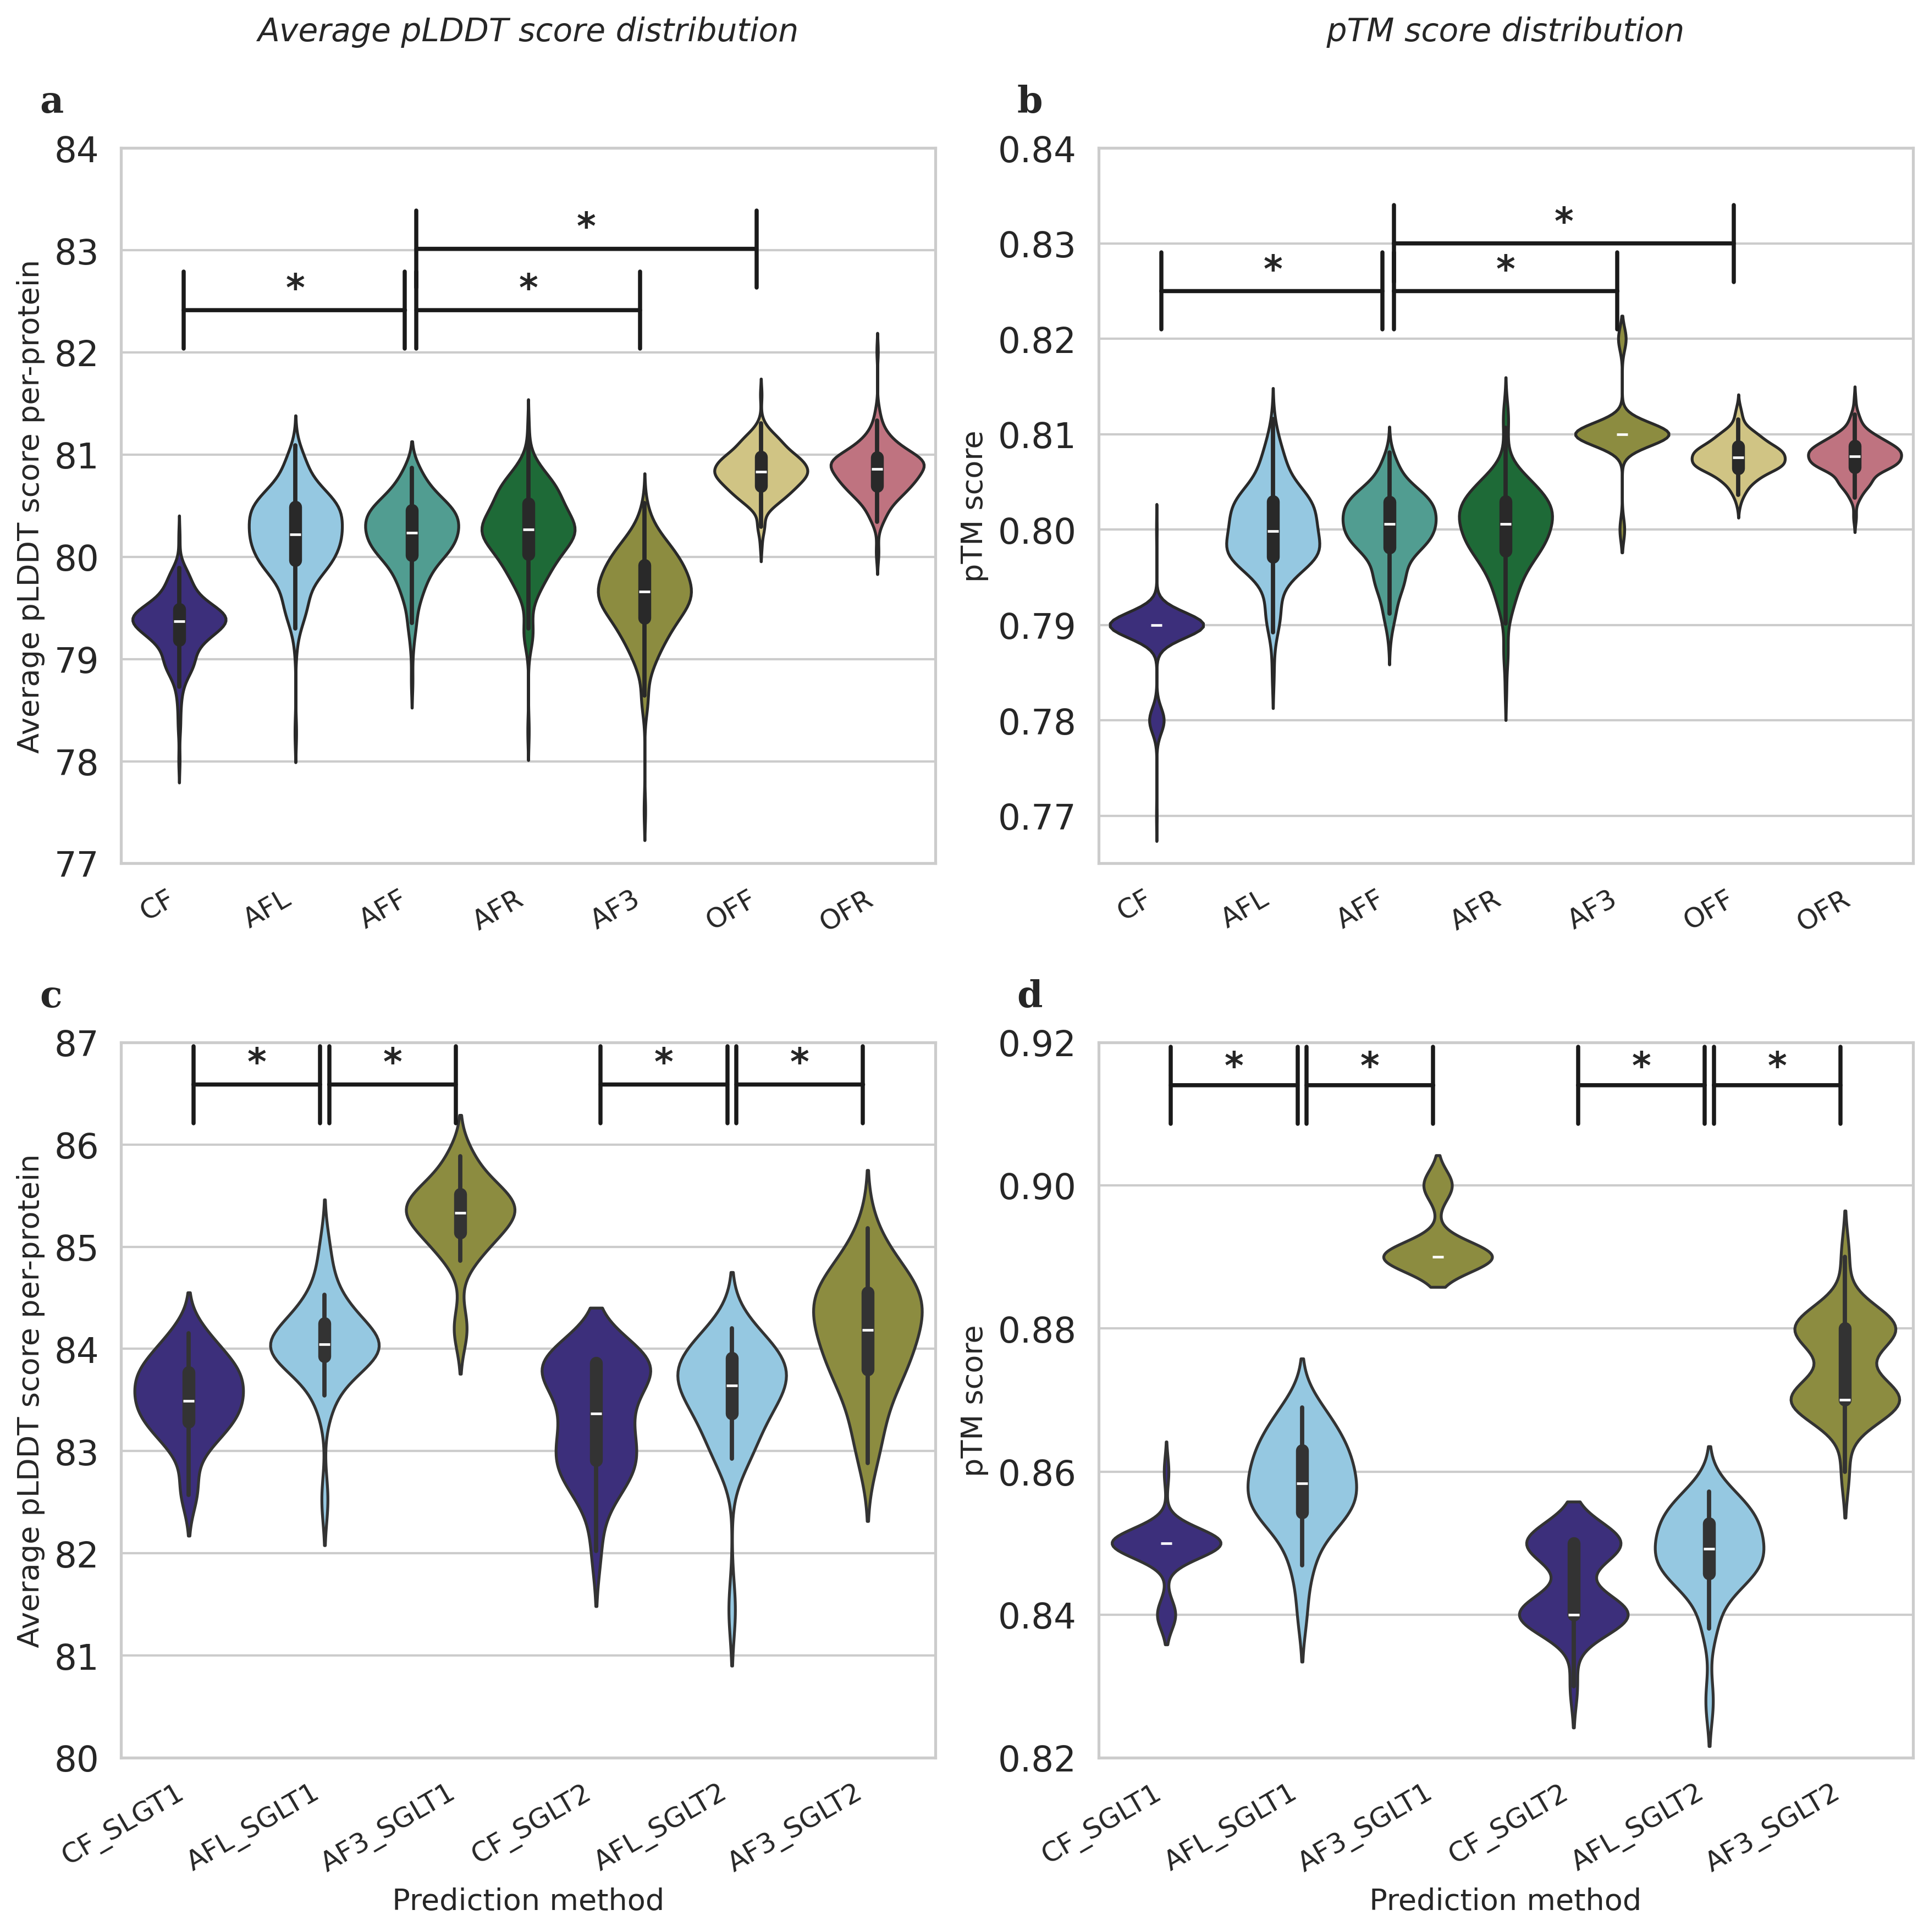

In [ ]:
# Ruta al archivo Excel en tu sistema local
excel_path = r'/content/drive/MyDrive/AF_OF/DataSource_Fig1.xlsx'

# Cargar las hojas necesarias del archivo Excel
Px_mean_NIS = pd.read_excel(excel_path, sheet_name='Px_mean_NIS')
pTMscore_NIS_pivot = pd.read_excel(excel_path, sheet_name='pTMscore_NIS_pivot')
pTMscore_NIS_mean = pTMscore_NIS_pivot.melt(id_vars=['NIS_Variant'], var_name='Algorithm', value_name='pTMscore')
pTMscore_mean_1 = pd.read_excel(excel_path, sheet_name='pTMscore_SGLT1')
pTMscore_mean_2 = pd.read_excel(excel_path, sheet_name='pTMscore_SGLT2')
Px_SGLT_mean = pd.read_excel(excel_path, sheet_name='Px_SGLT_mean')

# Concatenar SGLT1 y SGLT2
pTMscore_SGLT_mean = pd.concat([pTMscore_mean_1, pTMscore_mean_2])
# Set figure style for publication
sns.set(style="whitegrid", font_scale=1.4)
tol_colors = ["#332288", "#88CCEE", "#44AA99", "#117733", "#999933", "#DDCC77", "#CC6677", "#882255", "#AA4499"]
tol_colors_SGLT = ["#332288", "#88CCEE", "#999933"]

# Create a 2x2 figure layout
fig, axs = plt.subplots(2, 2, figsize=(12, 12), dpi=300)

# ------------------------------
# Subplot 1: pLDDT - NIS variants
# ------------------------------
sns.violinplot(ax=axs[0, 0], x='Algorithm', y='pLDDT', data=Px_mean_NIS, palette=tol_colors, dodge=False)
max_value_1 = np.max(Px_mean_NIS['pLDDT'])
axs[0, 0].text(1, (max_value_1 + 0.50), '*', ha='center', fontsize=16, weight='semibold')
axs[0, 0].text(3, (max_value_1 + 0.50), '*', ha='center', fontsize=16, weight='semibold')
axs[0, 0].text(3.5, (max_value_1 + 1.10), '*', ha='center', fontsize=16, weight='semibold')
axs[0, 0].annotate('', xy=(0, max_value_1 + 0.4), xytext=(1.98, max_value_1 + 0.4), arrowprops=dict(arrowstyle='|-|', lw=1.8, color='k'))
axs[0, 0].annotate('', xy=(2, max_value_1 + 0.4), xytext=(4, max_value_1 + 0.4), arrowprops=dict(arrowstyle='|-|', lw=1.8,color='k'))
axs[0, 0].annotate('', xy=(2, max_value_1 + 1), xytext=(5, max_value_1 + 1), arrowprops=dict(arrowstyle='|-|', lw=1.8,color='k'))

axs[0, 0].set_xlabel('', fontsize=13) #Prediction method - NIS
axs[0, 0].set_ylabel('Average pLDDT score per-protein', fontsize=13)
axs[0, 0].set_xticklabels(axs[0,0].get_xticklabels(), fontsize=12, rotation=30, ha='right')
axs[0, 0].set_ylim(77, 84)
axs[0, 0].text(-0.1, 1.05, 'a', transform=axs[0, 0].transAxes,fontsize=16, fontweight='bold', fontfamily='serif')
#Añade títulos tipo subtítulo arriba de 'a' y 'b'
axs[0, 0].text(0.5, 1.15, 'Average pLDDT score distribution',
              transform=axs[0, 0].transAxes, ha='center', fontsize=14, fontstyle='italic')

# ------------------------------
# Subplot 2: pTMscore - NIS
# ------------------------------
sns.violinplot(ax=axs[0, 1], x='Algorithm', y='pTMscore', data=pTMscore_NIS_mean, palette=tol_colors, dodge=False)
max_value_2 = np.max(pTMscore_NIS_mean['pTMscore'])
axs[0, 1].text(1, max_value_2 + 0.006, '*', ha='center', fontsize=16, weight='semibold')
axs[0, 1].text(3, max_value_2 + 0.006, '*', ha='center', fontsize=16, weight='semibold')
axs[0, 1].text(3.5, max_value_2 + 0.011, '*', ha='center', fontsize=16, weight='semibold')
axs[0, 1].annotate('', xy=(0, max_value_2 + 0.005), xytext=(1.98, max_value_2 + 0.005), arrowprops=dict(arrowstyle='|-|', lw=1.8,color='k'))
axs[0, 1].annotate('', xy=(2, max_value_2 + 0.005), xytext=(4, max_value_2 + 0.005), arrowprops=dict(arrowstyle='|-|', lw=1.8,color='k'))
axs[0, 1].annotate('', xy=(2, max_value_2 + 0.010), xytext=(5, max_value_2 + 0.010), arrowprops=dict(arrowstyle='|-|', lw=1.8,color='k'))

axs[0, 1].set_xlabel('', fontsize=13)#Prediction method - NIS
axs[0, 1].set_ylabel('pTM score', fontsize=13)
axs[0, 1].set_xticklabels(axs[0,1].get_xticklabels(), fontsize=12, rotation=30, ha='right')
axs[0, 1].set_ylim(0.765, 0.84)
axs[0, 1].text(-0.1, 1.05, 'b', transform=axs[0, 1].transAxes,fontsize=16, fontweight='bold', fontfamily='serif')
axs[0, 1].text(0.5, 1.15, ' pTM score distribution ',
              transform=axs[0, 1].transAxes, ha='center', fontsize=14, fontstyle='italic')
# ------------------------------
# Subplot 3: pLDDT - SGLT variants
# ------------------------------
sns.violinplot(ax=axs[1, 0], x='Algorithm', y='pLDDT', data=Px_SGLT_mean, palette=tol_colors_SGLT, dodge=False)
max_value_3 = np.max(Px_SGLT_mean['pLDDT'])
axs[1, 0].text(0.5, max_value_3 + 0.8, '*', ha='center', fontsize=16, weight='semibold')
axs[1, 0].text(1.5, max_value_3 + 0.8, '*', ha='center', fontsize=16, weight='semibold')
axs[1, 0].text(3.5, max_value_3 + 0.8, '*', ha='center', fontsize=16, weight='semibold')
axs[1, 0].text(4.5, max_value_3 + 0.8, '*', ha='center', fontsize=16, weight='semibold')

axs[1, 0].annotate('', xy=(0, max_value_3 + 0.7), xytext=(1, max_value_3 + 0.7), arrowprops=dict(arrowstyle='|-|', lw=1.8,color='k'))
axs[1, 0].annotate('', xy=(1, max_value_3 + 0.7), xytext=(2, max_value_3 + 0.7), arrowprops=dict(arrowstyle='|-|', lw=1.8,color='k'))
axs[1, 0].annotate('', xy=(3, max_value_3 + 0.7), xytext=(4, max_value_3 + 0.7), arrowprops=dict(arrowstyle='|-|', lw=1.8,color='k'))
axs[1, 0].annotate('', xy=(4, max_value_3 + 0.7), xytext=(5, max_value_3 + 0.7), arrowprops=dict(arrowstyle='|-|', lw=1.8,color='k'))

axs[1, 0].set_xlabel(' Prediction method ', fontsize=13)#(SGLT1 & SGLT2)
axs[1, 0].set_ylabel(' Average pLDDT score per-protein ', fontsize=13)
axs[1, 0].set_xticklabels(axs[1,0].get_xticklabels(), fontsize=12, rotation=30, ha='right')
axs[1, 0].set_ylim(80, 87)
#axs[1, 0].set_title('')
axs[1, 0].text(-0.1, 1.05, 'c', transform=axs[1, 0].transAxes,fontsize=16, fontweight='bold', fontfamily='serif')
# ------------------------------
# Subplot 4: pTMscore - SGLT variants
# ------------------------------
sns.violinplot(ax=axs[1, 1], x='Algorithm', y='pTMscore', data=pTMscore_SGLT_mean, palette=tol_colors_SGLT, dodge=False)
max_value_4 = np.max(pTMscore_SGLT_mean['pTMscore'])
axs[1, 1].text(0.5, max_value_4 + 0.015, '*', ha='center', fontsize=16, weight='semibold')
axs[1, 1].text(1.5, max_value_4 + 0.015, '*', ha='center', fontsize=16, weight='semibold')
axs[1, 1].text(3.5, max_value_4 + 0.015, '*', ha='center', fontsize=16, weight='semibold')
axs[1, 1].text(4.5, max_value_4 + 0.015, '*', ha='center', fontsize=16, weight='semibold')

axs[1, 1].annotate('', xy=(0, max_value_4 + 0.014), xytext=(1, max_value_4 + 0.014), arrowprops=dict(arrowstyle='|-|', lw=1.8,color='k'))
axs[1, 1].annotate('', xy=(1, max_value_4 + 0.014), xytext=(2, max_value_4 + 0.014), arrowprops=dict(arrowstyle='|-|', lw=1.8,color='k'))
axs[1, 1].annotate('', xy=(3, max_value_4 + 0.014), xytext=(4, max_value_4 + 0.014), arrowprops=dict(arrowstyle='|-|', lw=1.8,color='k'))
axs[1, 1].annotate('', xy=(4, max_value_4 + 0.014), xytext=(5, max_value_4 + 0.014), arrowprops=dict(arrowstyle='|-|', lw=1.8,color='k'))

axs[1, 1].set_xlabel(' Prediction method ', fontsize=13)#(SGLT1 & SLGT2)
axs[1, 1].set_ylabel('pTM score', fontsize=13)
axs[1, 1].set_xticklabels(axs[1,1].get_xticklabels(), fontsize=12, rotation=30, ha='right')
axs[1, 1].set_title('')
axs[1, 1].set_ylim(0.82, 0.92)
axs[1, 1].text(-0.1, 1.05, 'd', transform=axs[1, 1].transAxes,fontsize=16, fontweight='bold', fontfamily='serif')
# Adjust layout for better spacing
plt.tight_layout()
plt.subplots_adjust(wspace=0.2, hspace=0.25)
#plt.show()
#plt.tight_layout()
# plt.savefig("Figure_1.pdf", format="pdf", bbox_inches='tight', dpi=300)
# plt.show()


## Figure 2

In [ ]:
!pip install umap-learn[plot]
!pip install holoviews
!pip install -U ipykernel

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs val

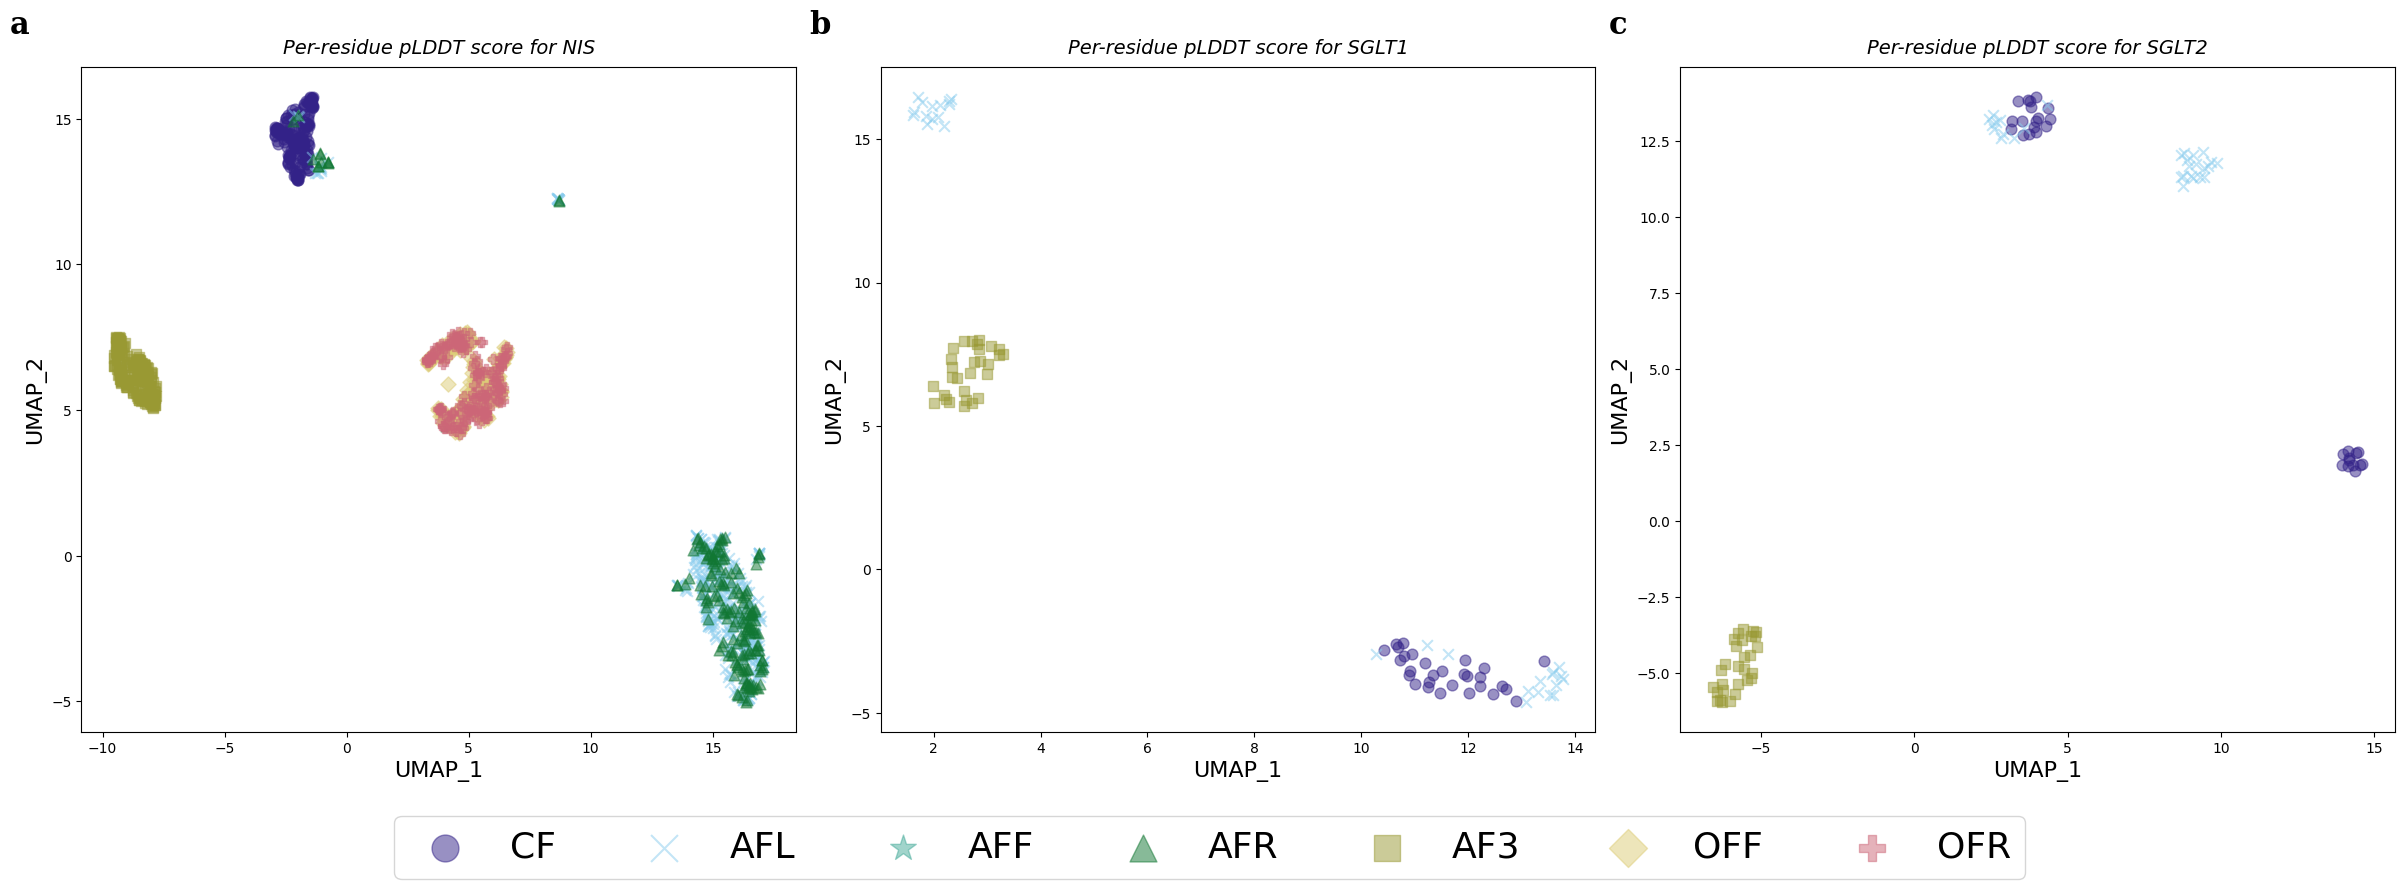

In [ ]:
# ===== Import libraries =====
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import umap
import matplotlib.pyplot as plt

# ===== Load Excel file with all data matrices =====
excel_path = '/content/drive/MyDrive/AF_OF/DataSource_Fig2.xlsx'

# Load the necessary sheets: per-residue pLDDT matrices for NIS, SGLT1, and SGLT2
Matrix_P = pd.read_excel(excel_path, sheet_name='Matrix_P')            # NIS
MatrixP_SGLT1 = pd.read_excel(excel_path, sheet_name='MatrixP_SGLT1')  # SGLT1
MatrixP_SGLT2 = pd.read_excel(excel_path, sheet_name='MatrixP_SGLT2')  # SGLT2

# ===== General function for UMAP dimensionality reduction =====
def preparar_datos_umap(df, columnas_excluir, map_algoritmos=None):
    """
    Applies UMAP on numeric data after excluding categorical columns.
    Optionally remaps 'Algorithm' names to shorter labels.

    Parameters:
        df (pd.DataFrame): Input dataframe.
        columnas_excluir (list): List of column names to exclude (non-numeric).
        map_algoritmos (dict): Optional dictionary to rename 'Algorithm' labels.

    Returns:
        embedding (np.ndarray): 2D UMAP projection.
        df (pd.DataFrame): Original dataframe (possibly with renamed 'Algorithm').
    """
    if map_algoritmos:
        df['Algorithm'] = df['Algorithm'].replace(map_algoritmos)

    # Drop categorical columns
    df_reducida = df.drop(columns=columnas_excluir, axis=1)

    # Standardize numeric values
    scaler = StandardScaler()
    datos_escalados = scaler.fit_transform(df_reducida)

    # Fill any potential NaNs with column mean
    df_escalado = pd.DataFrame(datos_escalados).fillna(
        pd.DataFrame(datos_escalados).mean()
    )

    # Apply UMAP for dimensionality reduction
    umap_model = umap.UMAP(n_components=2, random_state=42)
    embedding = umap_model.fit_transform(df_escalado)

    return embedding, df

# ===== Apply UMAP to each dataset =====

# --- NIS dataset ---
columnas_nis = ['Type', 'Algorithm', 'NIS_Variant']
betas_reducidos_NIS, df_NIS = preparar_datos_umap(Matrix_P, columnas_nis)

# --- SGLT1 dataset ---
columnas_sglt1 = ['Variant', 'Algorithm']
mapa_algoritmos_sglt1 = {
    "CF_SGLT1": "CF",
    "AFL_SGLT1": "AFL",
    "AF3_SGLT1": "AF3"
}
betas_reducidos_SGLT1, df_SGLT1 = preparar_datos_umap(MatrixP_SGLT1, columnas_sglt1, mapa_algoritmos_sglt1)

# --- SGLT2 dataset ---
columnas_sglt2 = ['Variant', 'Algorithm']
mapa_algoritmos_sglt2 = {
    "CF_SGLT2": "CF",
    "AFL_SGLT2": "AFL",
    "AF3_SGLT2": "AF3"
}
betas_reducidos_SGLT2, df_SGLT2 = preparar_datos_umap(MatrixP_SGLT2, columnas_sglt2, mapa_algoritmos_sglt2)

# ===== Prepare labels and color/style mapping =====

# Algorithm mapping to shorter folder-like names
mapa_carpeta = {
    "CF": "CF",
    "AFL": "AFL",
    "AFF": "AFF",
    "AFR": "AFR",
    "AF3": "AF3",
    "OFF": "OFF",
    "OFR": "OFR"
}

# Map algorithm names to simplified labels
df_SGLT1['Carpeta_mapped'] = df_SGLT1["Algorithm"].map(mapa_carpeta).fillna(0)
df_SGLT2['Carpeta_mapped'] = df_SGLT2["Algorithm"].map(mapa_carpeta).fillna(0)
df_NIS['Carpeta_mapped']   = df_NIS["Algorithm"].map(mapa_carpeta).fillna(0)

# Define marker style and color palette (colorblind-friendly Tol palette)
markers = ['o', 'x', '*', '^', 's', 'D', 'P']
tol_colors = ["#332288", "#88CCEE", "#44AA99", "#117733", "#999933", "#DDCC77", "#CC6677"]
point_size = 60

# ===== Plotting the UMAP projections =====
fig, axes = plt.subplots(1, 3, figsize=(24, 8))

# --- Subplot A: NIS ---
ax1 = axes[0]
for carpeta, color, marker in zip(mapa_carpeta.values(), tol_colors, markers):
    indices = df_NIS[df_NIS['Carpeta_mapped'] == carpeta].index
    ax1.scatter(betas_reducidos_NIS[indices, 0], betas_reducidos_NIS[indices, 1],
                label=carpeta, color=color, marker=marker, s=point_size, alpha=0.5)

ax1.set_xlabel('UMAP_1', fontsize=16)
ax1.set_ylabel('UMAP_2', fontsize=16)
ax1.text(-0.1, 1.05, 'a', transform=ax1.transAxes, fontsize=22, fontweight='bold', fontfamily='serif')
ax1.text(0.5, 1.02, 'Per-residue pLDDT score for NIS',
         transform=ax1.transAxes, ha='center', fontsize=14, fontstyle='italic')

# --- Subplot B: SGLT1 ---
ax2 = axes[1]
for carpeta, color, marker in zip(mapa_carpeta.values(), tol_colors, markers):
    indices = df_SGLT1[df_SGLT1['Carpeta_mapped'] == carpeta].index
    ax2.scatter(betas_reducidos_SGLT1[indices, 0], betas_reducidos_SGLT1[indices, 1],
                label=carpeta, color=color, marker=marker, s=point_size, alpha=0.5)

ax2.set_xlabel('UMAP_1', fontsize=16)
ax2.set_ylabel('UMAP_2', fontsize=16)
ax2.text(-0.1, 1.05, 'b', transform=ax2.transAxes, fontsize=22, fontweight='bold', fontfamily='serif')
ax2.text(0.5, 1.02, 'Per-residue pLDDT score for SGLT1',
         transform=ax2.transAxes, ha='center', fontsize=14, fontstyle='italic')

# --- Subplot C: SGLT2 ---
ax3 = axes[2]
for carpeta, color, marker in zip(mapa_carpeta.values(), tol_colors, markers):
    indices = df_SGLT2[df_SGLT2['Carpeta_mapped'] == carpeta].index
    ax3.scatter(betas_reducidos_SGLT2[indices, 0], betas_reducidos_SGLT2[indices, 1],
                label=carpeta, color=color, marker=marker, s=point_size, alpha=0.5)

ax3.set_xlabel('UMAP_1', fontsize=16)
ax3.set_ylabel('UMAP_2', fontsize=16)
ax3.text(-0.1, 1.05, 'c', transform=ax3.transAxes, fontsize=22, fontweight='bold', fontfamily='serif')
ax3.text(0.5, 1.02, 'Per-residue pLDDT score for SGLT2',
         transform=ax3.transAxes, ha='center', fontsize=14, fontstyle='italic')

# --- Shared legend and layout adjustment ---
plt.tight_layout()
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels,
           loc='lower center', bbox_to_anchor=(0.5, -0.125),
           ncol=7, frameon=True,
           prop={'size': 26}, scatterpoints=1, markerscale=2.5)

# Optional: Save the figure as PDF
# plt.savefig("Figure_2.pdf", bbox_inches='tight', dpi=300)
plt.show()


## Figure 3

<ipython-input-13-b14337d4ffca>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(ax=ax1, x='Algorithm', y='ΔpLDDT', data=Mx_mean,
<ipython-input-13-b14337d4ffca>:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=12)
<ipython-input-13-b14337d4ffca>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(ax=ax2, x='Algorithm', y='ΔpLDDT', data=Mx_NIS_mean_AFL,
<ipython-input-13-b14337d4ffca>:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xtickl

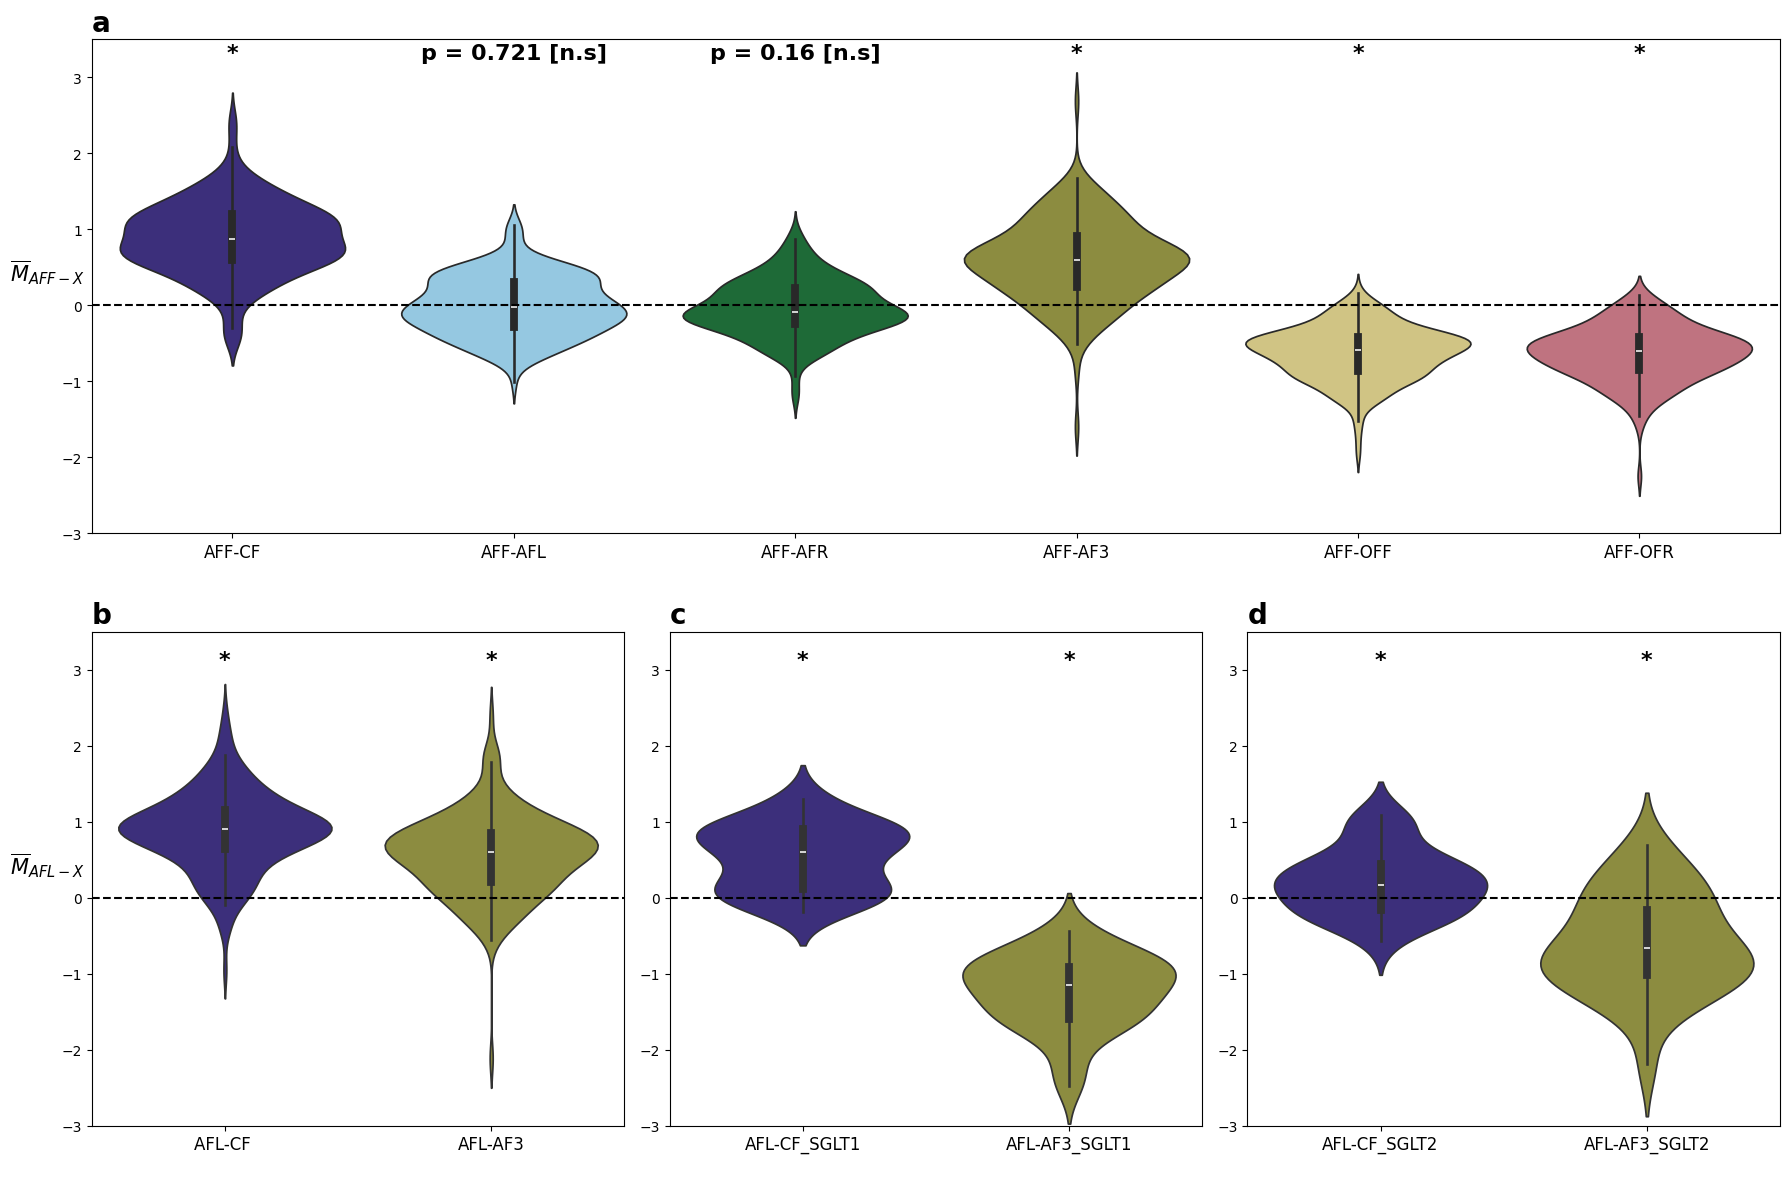

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# ===== Cargar Excel con todas las matrices =====
excel_path = '/content/drive/MyDrive/AF_OF/DataSource_Fig3.xlsx'

# Cargar hojas necesarias
Mx_mean = pd.read_excel(excel_path, sheet_name='Mx_mean')  # NIS
Mx_NIS_mean_AFL = pd.read_excel(excel_path, sheet_name='Mx_NIS_mean_AFL')  # SGLT1
Mx_SGLT1_mean = pd.read_excel(excel_path, sheet_name='Mx_SGLT1_mean')  # SGLT2
Mx_SGLT2_mean = pd.read_excel(excel_path, sheet_name='Mx_SGLT2_mean')  # SGLT2

# Custom order and colors
ordered_algorithms = ['AFF-CF', 'AFF-AFL', 'AFF-AFR', 'AFF-AF3', 'AFF-OFF', 'AFF-OFR']
tol_colors = ["#332288", "#88CCEE", "#44AA99", "#117733", "#999933", "#DDCC77", "#CC6677"]
colors_full = [tol_colors[0], tol_colors[1], tol_colors[3], tol_colors[4], tol_colors[5], tol_colors[6]]
colors_AFL = [tol_colors[0], tol_colors[4]]

# Create figure
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(2, 3, height_ratios=[2, 2])

# Subplot a
ax1 = fig.add_subplot(gs[0, :])
sns.violinplot(ax=ax1, x='Algorithm', y='ΔpLDDT', data=Mx_mean,
               palette=colors_full, order=ordered_algorithms, dodge=False)
ax1.set_ylim(-3, 3.5)
ax1.set_title('a', fontsize=20, fontweight='bold', loc='left')
ax1.set_xlabel(' ', fontsize=16)
ax1.set_ylabel(r'$\overline{M}_{ AFF-X}$', fontsize=15,rotation=0, labelpad=10) # $\bar{M}_{\mathrm{REF}-X}$
ax1.axhline(y=0, color='black', linestyle='--')
ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=12)

# Wilcoxon p-values (static)
y_offset = Mx_mean['ΔpLDDT'].max() + 0.5
pvals = ['*', 'p = 0.721 [n.s]', 'p = 0.16 [n.s]', '*', '*', '*']
for i, p in enumerate(pvals):
    ax1.text(i, y_offset, p, ha='center', va='bottom', fontsize=16, weight='semibold')

# Subplot b
ax2 = fig.add_subplot(gs[1, 0])
sns.violinplot(ax=ax2, x='Algorithm', y='ΔpLDDT', data=Mx_NIS_mean_AFL,
               palette=colors_AFL, dodge=False)
ax2.set_ylim(-3, 3.5)
ax2.set_title('b', fontsize=20, fontweight='bold', loc='left')
ax2.set_xlabel(r' ', fontsize=16)
ax2.set_ylabel(r'$\overline{M}_{ AFL-X}$', fontsize=15,rotation=0, labelpad=10)
ax2.axhline(y=0, color='black', linestyle='--')
ax2.set_xticklabels(ax2.get_xticklabels(), fontsize=12)

for i, tick in enumerate(Mx_NIS_mean_AFL['Algorithm'].unique()):
    ax2.text(i, 3, '*', ha='center', va='bottom', fontsize=16, fontweight='bold')

# Subplot c
ax3 = fig.add_subplot(gs[1, 1])
sns.violinplot(ax=ax3, x='Algorithm', y='ΔpLLDT', data=Mx_SGLT1_mean,
               palette=colors_AFL, dodge=False)
ax3.set_ylim(-3, 3.5)
ax3.set_title('c', fontsize=20, fontweight='bold', loc='left')
ax3.set_xlabel('')
ax3.set_ylabel('')
ax3.axhline(y=0, color='black', linestyle='--')
ax3.set_xticklabels(ax3.get_xticklabels(), fontsize=12)

for i, tick in enumerate(Mx_SGLT1_mean['Algorithm'].unique()):
    ax3.text(i, 3, '*', ha='center', va='bottom', fontsize=16, fontweight='bold')

# Subplot d
ax4 = fig.add_subplot(gs[1, 2])
sns.violinplot(ax=ax4, x='Algorithm', y='ΔpLLDT', data=Mx_SGLT2_mean,
               palette=colors_AFL, dodge=False)
ax4.set_ylim(-3, 3.5)
ax4.set_title('d', fontsize=20, fontweight='bold', loc='left')
ax4.set_xlabel('')
ax4.set_ylabel('')
ax4.axhline(y=0, color='black', linestyle='--')
ax4.set_xticklabels(ax4.get_xticklabels(), fontsize=12)

for i, tick in enumerate(Mx_SGLT2_mean['Algorithm'].unique()):
    ax4.text(i, 3, '*', ha='center', va='bottom', fontsize=16, fontweight='bold')

# Layout
plt.tight_layout()
plt.show()
#plt.savefig("Figure_3.pdf", bbox_inches='tight', dpi=300)


## Figure 4

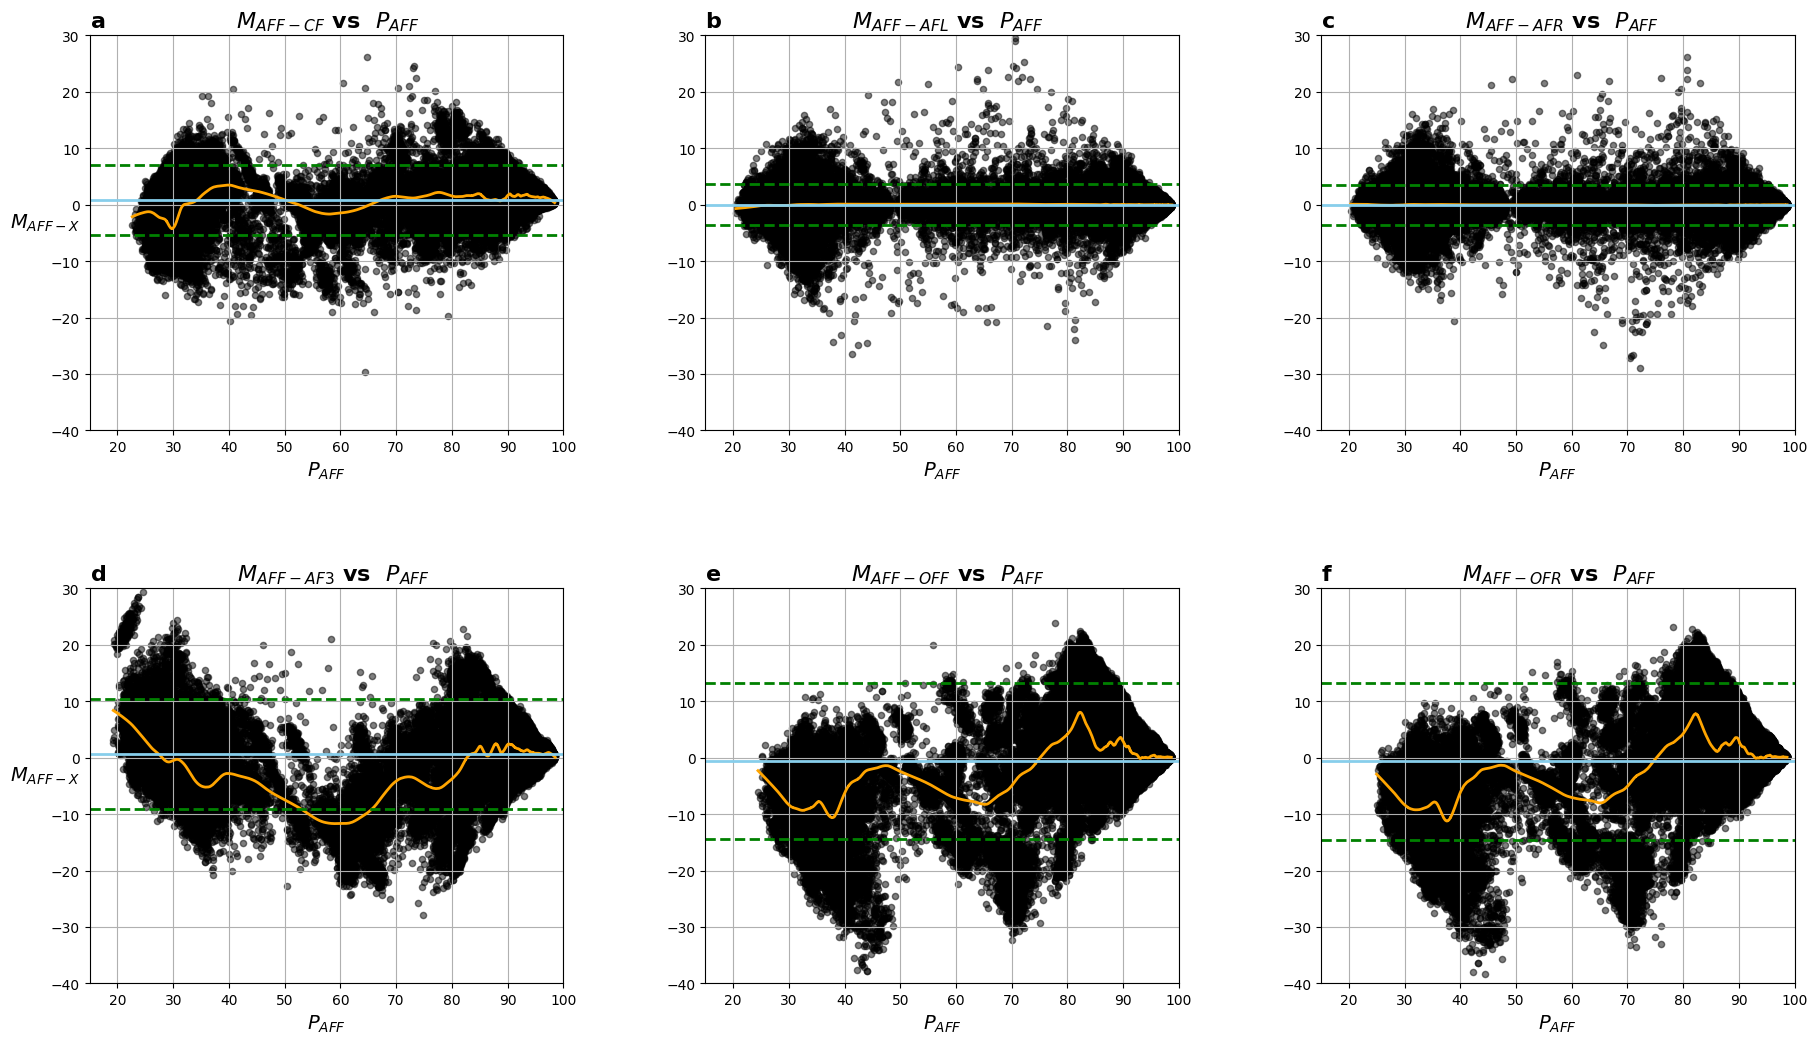

In [ ]:
# =========================
# FIGURE 4: M-P - BLAND-ALTMAN PLOTS – NIS CONFIDENCE (P MATRIX)
# =========================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

# Path to the Excel file containing matrices
excel_path = '/content/drive/MyDrive/AF_OF/DataSource_Fig4.xlsx'

# --------- LOAD AND FLATTEN MATRICES FROM EACH SHEET ---------
def load_all_flattened_matrices(excel_path, columns_to_remove):
    """
    Load all sheets from the Excel file, remove specified non-numeric columns,
    flatten the resulting matrices, and return them as a dictionary.

    Parameters:
        excel_path (str): Path to the Excel file.
        columns_to_remove (list): Column names to exclude before flattening.

    Returns:
        dict: Keys are sheet names, values are flattened numpy arrays.
    """
    # Read all sheets from the Excel file
    sheets = pd.read_excel(excel_path, sheet_name=None)

    flattened_matrices = {}

    for sheet_name, df in sheets.items():
        try:
            # Drop non-numeric columns
            filtered_df = df.drop(columns=columns_to_remove)
            # Flatten and store the matrix
            flattened_matrices[sheet_name] = filtered_df.values.flatten()
        except KeyError:
            print(f"[WARNING] Sheet '{sheet_name}' does not contain expected columns: {columns_to_remove}")

    return flattened_matrices

# Columns to exclude before flattening
non_numeric_columns = ['NIS_Variant', 'Algorithm', 'Type']

# Load and flatten all matrices from the Excel file
flattened_matrices = load_all_flattened_matrices(excel_path, non_numeric_columns)

# Optionally assign to variables if needed later
pAFF = flattened_matrices.get('MatrixP_AFF')
pCF  = flattened_matrices.get('MatrixP_CF')
pAFL = flattened_matrices.get('MatrixP_AFL')
pAFR = flattened_matrices.get('MatrixP_AFR')
pAF3 = flattened_matrices.get('MatrixP_AF3')
pOFF = flattened_matrices.get('MatrixP_OFF')
pOFR = flattened_matrices.get('MatrixP_OFR')

# --------- FUNCTION TO CREATE BLAND-ALTMAN PLOTS ---------
def bland_altman_subplot(ax, x_ref, y, xlabel, ylabel, label_rotation=90):
    """
    Create a Bland-Altman plot on the specified Axes.

    Parameters:
        ax (matplotlib.axes.Axes): The subplot axis.
        x_ref (np.array): Reference data (e.g., pAFF).
        y (np.array): Comparison method data.
        xlabel (str): X-axis label.
        ylabel (str): Y-axis label.
        label_rotation (int): Rotation angle for y-axis label.
    """
    diff = x_ref - y  # Difference between reference and method
    mean_diff = np.mean(diff)  # Mean difference
    LoA = 1.96 * np.std(diff)  # Limits of Agreement (±1.96 SD)
    smoothed = lowess(diff, (x_ref + y) / 2, frac=0.03)  # Smoothed trend line

    # Scatter plot of mean vs difference
    ax.scatter((x_ref + y) / 2, diff, color='black', alpha=0.5, s=20)
    # Smoothed trend line
    ax.plot(smoothed[:, 0], smoothed[:, 1], color='orange', linewidth=2)
    # Mean line
    ax.axhline(mean_diff, color='skyblue', linestyle='-', linewidth=2)
    # Limits of agreement
    ax.axhline(mean_diff + LoA, color='green', linestyle='--', linewidth=2)
    ax.axhline(mean_diff - LoA, color='green', linestyle='--', linewidth=2)

    ax.set_xlabel(xlabel, fontsize=14, fontweight='bold')
    ax.set_ylabel(ylabel, fontsize=14, fontweight='bold', rotation=label_rotation)
    ax.set_xlim(15, 100)
    ax.set_ylim(-40, 30)
    ax.grid(True)

# --------- GENERATE COMPOSITE FIGURE ---------
fig, axes = plt.subplots(2, 3, figsize=(22, 12))  # 2 rows, 3 columns
plt.subplots_adjust(top=0.9, hspace=0.4, wspace=0.3)  # Spacing adjustments

# Titles and data for each subplot
plots = [
    ('a                 ${M}_{AFF-CF}$ vs  ${P}_{AFF}$',  pCF),
    ('b                 ${M}_{AFF-AFL}$ vs  ${P}_{AFF}$', pAFL),
    ('c                 ${M}_{AFF-AFR}$ vs  ${P}_{AFF}$', pAFR),
    ('d                 ${M}_{AFF-AF3}$ vs  ${P}_{AFF}$', pAF3),
    ('e                 ${M}_{AFF-OFF}$ vs  ${P}_{AFF}$', pOFF),
    ('f                 ${M}_{AFF-OFR}$ vs  ${P}_{AFF}$', pOFR)
]

# Create each subplot using the defined function
for idx, (title, method_data) in enumerate(plots):
    ax = axes[idx // 3, idx % 3]  # Get subplot axis

    # Define which subplots will show y-axis labels
    show_ylabel = idx in [0, 3]

    # Define which subplots will show x-axis labels
    show_xlabel = (idx >= 3)

    # Call plotting function
    bland_altman_subplot(
        ax,
        pAFF,
        method_data,
        xlabel=r'${P}_{AFF}$' if show_xlabel else '${P}_{AFF}$',
        ylabel=r'${M}_{AFF-X}$' if show_ylabel else '',
        label_rotation=0
    )

    # Add subplot title
    ax.set_title(title, fontsize=16, fontweight='bold', loc='left')

# Save the full figure as high-resolution PDF
plt.savefig("Figure_4.pdf", bbox_inches='tight', dpi=300)
plt.show()


## Figure 5



In [ ]:
# -------------------- Intall libreries --------------------
# Estas líneas solo son necesarias en Google Colab, comentalas si estás en local
!pip install umap-learn[plot]
!pip install holoviews
!pip install -U ipykernel

# -------------------- libreries --------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import umap
from sklearn.preprocessing import StandardScaler


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 64.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 30.0 MB/s eta 0:00:00
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 6.17.1
    Uninstalling ipykernel-6.17.1:
      Successfully uninstalled ipykernel-6.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipykernel==6.17.1, but you have ipykernel 6.29.5 which is incompatible.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


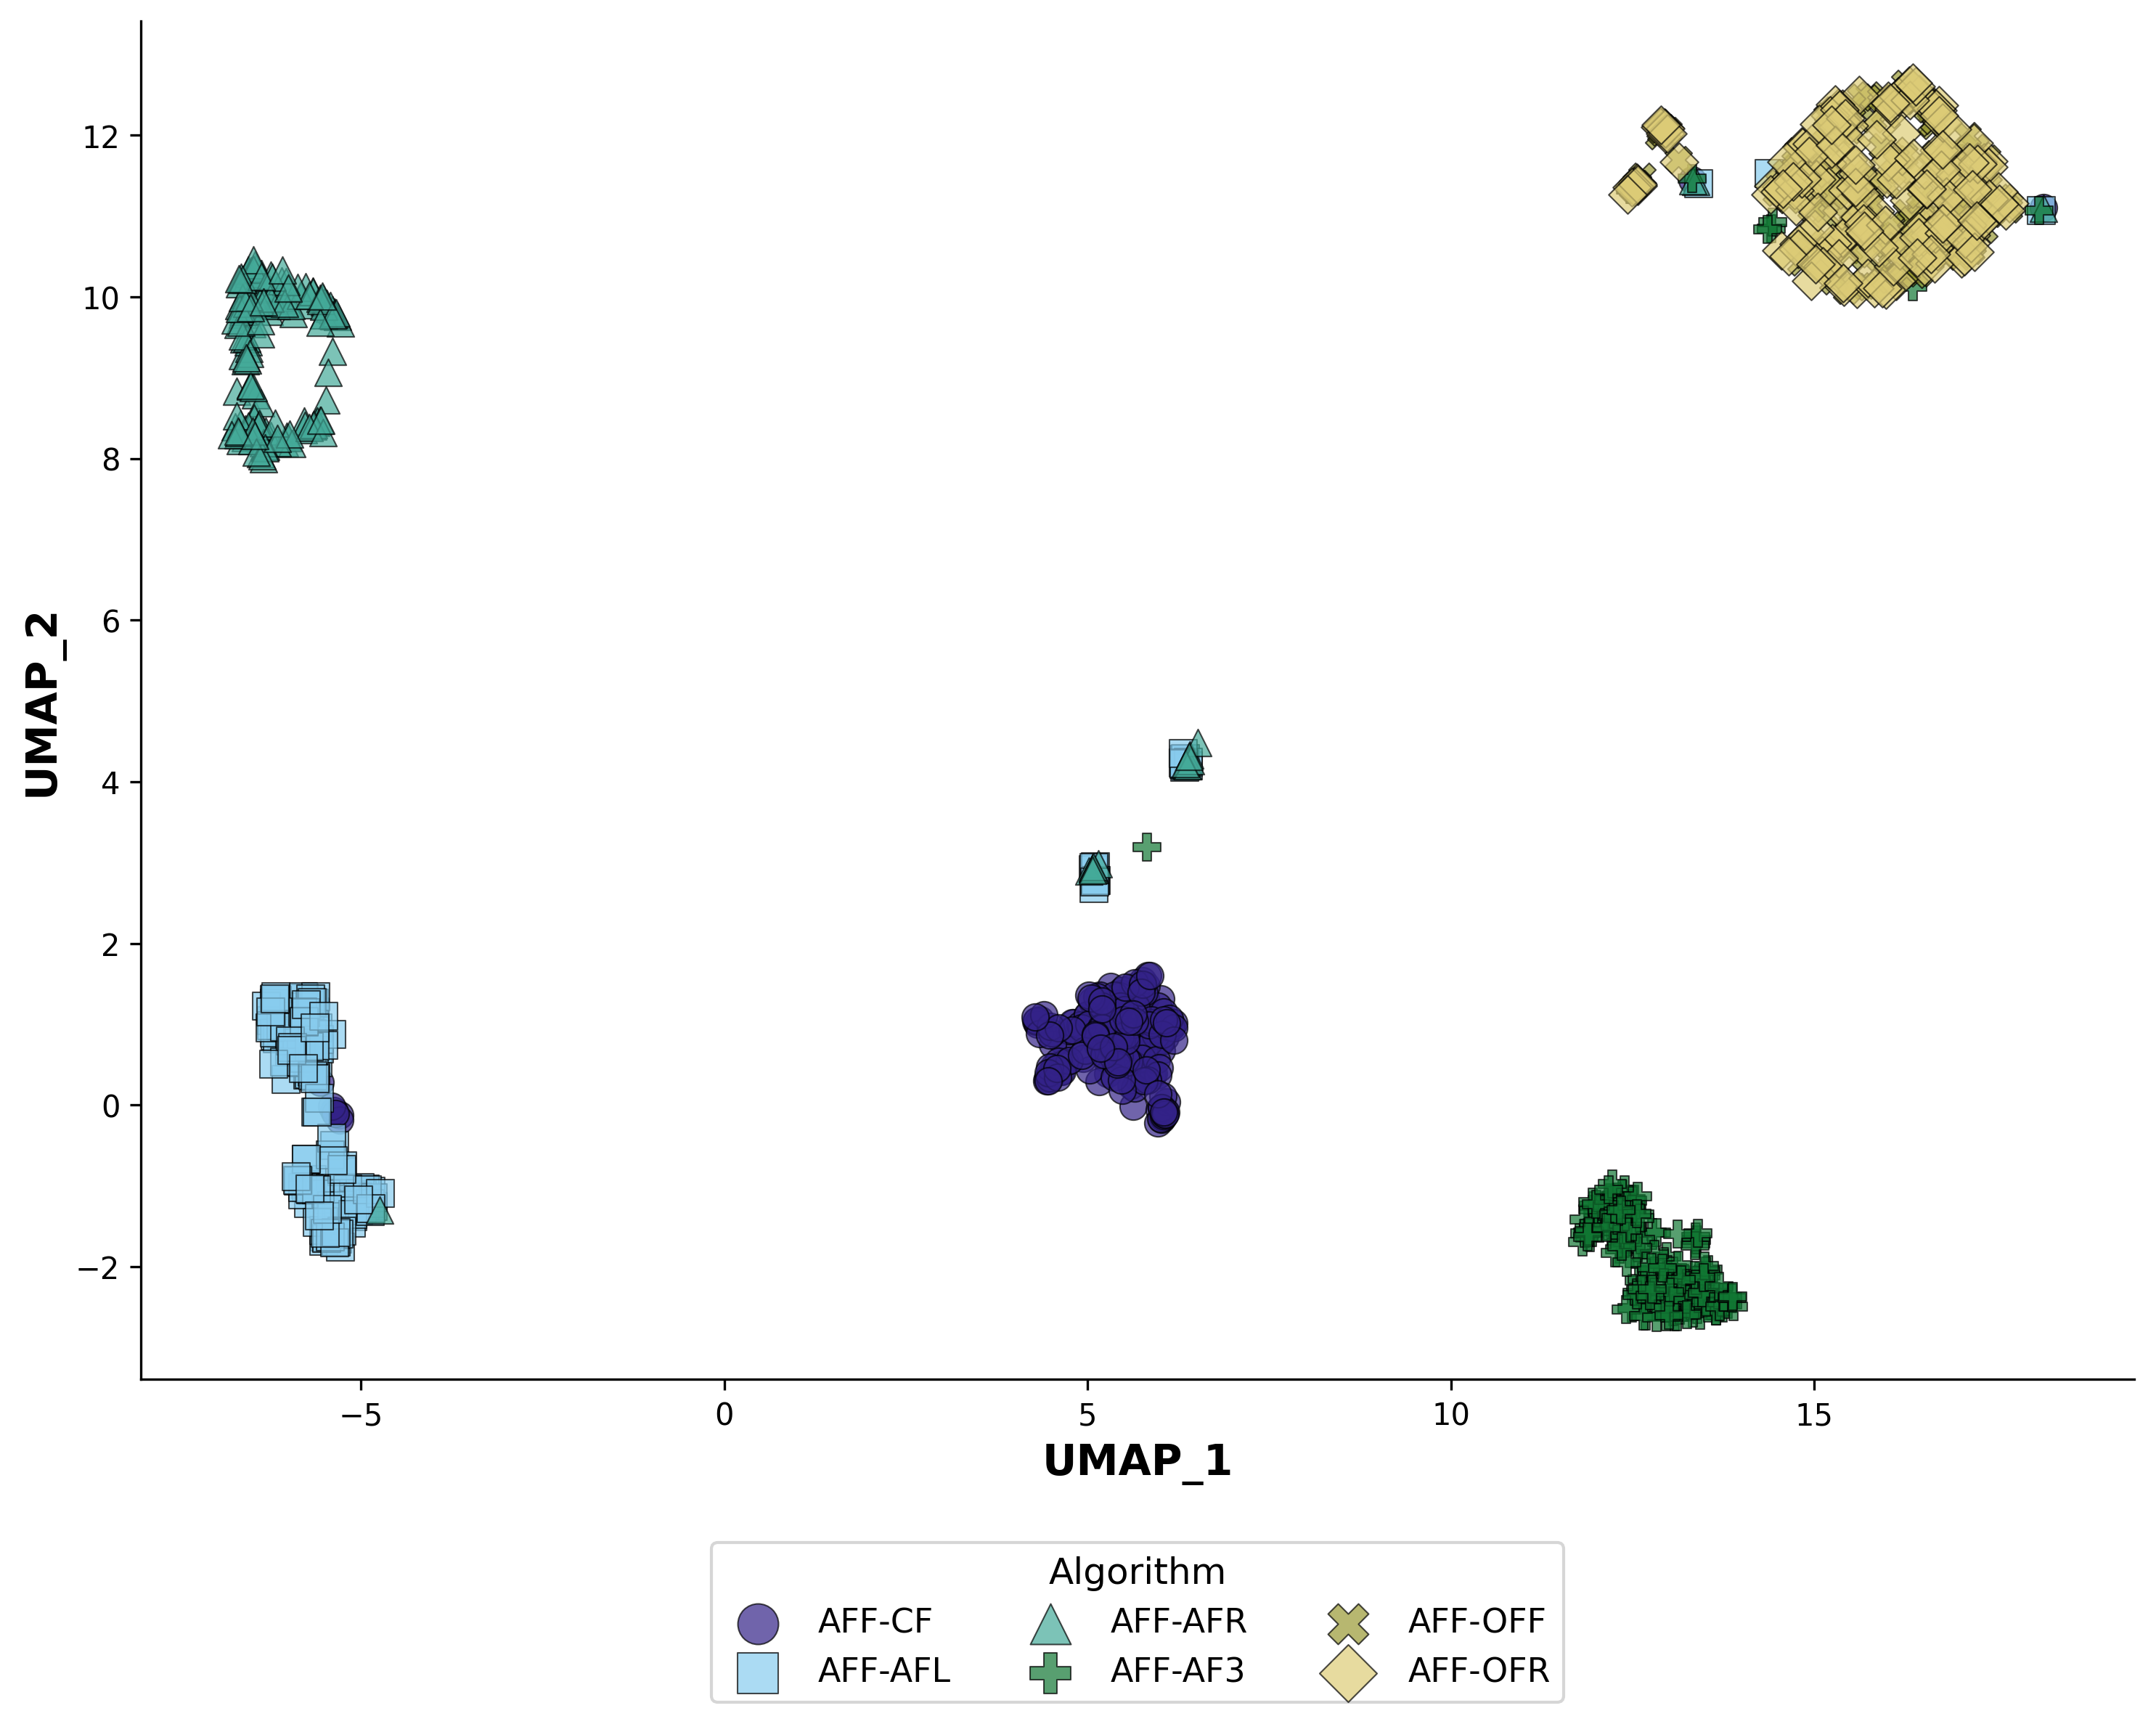

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import umap
from sklearn.preprocessing import StandardScaler

# -------------------- 1. LOAD DATA --------------------
# Load the dataset containing the D matrix with NIS variants
ruta_en_drive = '/content/drive/MyDrive/AF_OF/NIS/Matrix_D_NIS_HC.csv'
Matrix_D = pd.read_csv(ruta_en_drive)

# -------------------- 2. DATA PREPROCESSING --------------------
# Remove metadata columns not used in the UMAP analysis
columns_to_remove = ['NIS_Variant', 'Algorithm', 'Type']
Matrix_D_numeric = Matrix_D.drop(columns=columns_to_remove)

# Scale data using standard normalization (zero mean, unit variance)
scaler = StandardScaler()
scaled_betas_D = scaler.fit_transform(Matrix_D_numeric)
Matrix_D_numeric = pd.DataFrame(scaled_betas_D)

# Fill missing values (if any) with the column mean
Matrix_D_numeric = Matrix_D_numeric.fillna(Matrix_D_numeric.mean())

# -------------------- 3. UMAP DIMENSIONALITY REDUCTION --------------------
# Reduce dimensionality to 2D using UMAP for visualization
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
D_RED = umap_model.fit_transform(Matrix_D_numeric)

# -------------------- 4. RENAME ALGORITHM LABELS --------------------
# Map internal algorithm codes to formatted names for plotting
algorithm_map = {
    'CF': 'AFF-CF', 'AFL': 'AFF-AFL', 'AFR': 'AFF-AFR',
    'AF3': 'AFF-AF3', 'OFF': 'AFF-OFF', 'OFR': 'AFF-OFR'
}
Matrix_D['Group'] = Matrix_D['Algorithm'].replace(algorithm_map)

# -------------------- 5. PLOT STYLE CONFIGURATION --------------------
# Define visual style: Tol palette colors and distinct markers
tol_colors = ["#332288", "#88CCEE", "#44AA99", "#117733", "#999933", "#DDCC77", "#CC6677"]
markers = ['o', 's', '^', 'P', 'X', 'D']
point_size = 80

# -------------------- 6. PROFESSIONAL PLOTTING --------------------
fig, ax = plt.subplots(figsize=(10, 8), dpi=300)

# Plot each algorithm group with its respective color and marker
for group, color, marker in zip(algorithm_map.values(), tol_colors, markers):
    indices = Matrix_D[Matrix_D['Group'] == group].index
    ax.scatter(D_RED[indices, 0], D_RED[indices, 1],
               label=group, color=color, marker=marker,
               s=point_size, alpha=0.7, edgecolors='k', linewidth=0.5)

# Axis labels
ax.set_xlabel('UMAP_1', fontsize=14, fontweight='bold')
ax.set_ylabel('UMAP_2', fontsize=14, fontweight='bold')
# ax.set_title('UMAP of D (AFF-X) - NIS', fontsize=16, fontweight='bold')  # Optional title

# Elegant legend
ax.legend(title='Algorithm', title_fontsize=12, fontsize=11,
          loc='lower center', bbox_to_anchor=(0.5, -0.25),
          ncol=3, frameon=True, markerscale=1.5)

# Remove unnecessary plot borders
sns.despine()

# Adjust layout to prevent clipping
plt.tight_layout()

# -------------------- 7. SAVE PLOT AS PDF --------------------
# Uncomment to export the figure as a high-quality PDF
# plt.savefig('/content/drive/MyDrive/AF_OF/Figuras/UMAP_D_AFFX_NIS.pdf', format='pdf', bbox_inches='tight')

# -------------------- 8. DISPLAY PLOT --------------------
plt.show()


## Figure 6


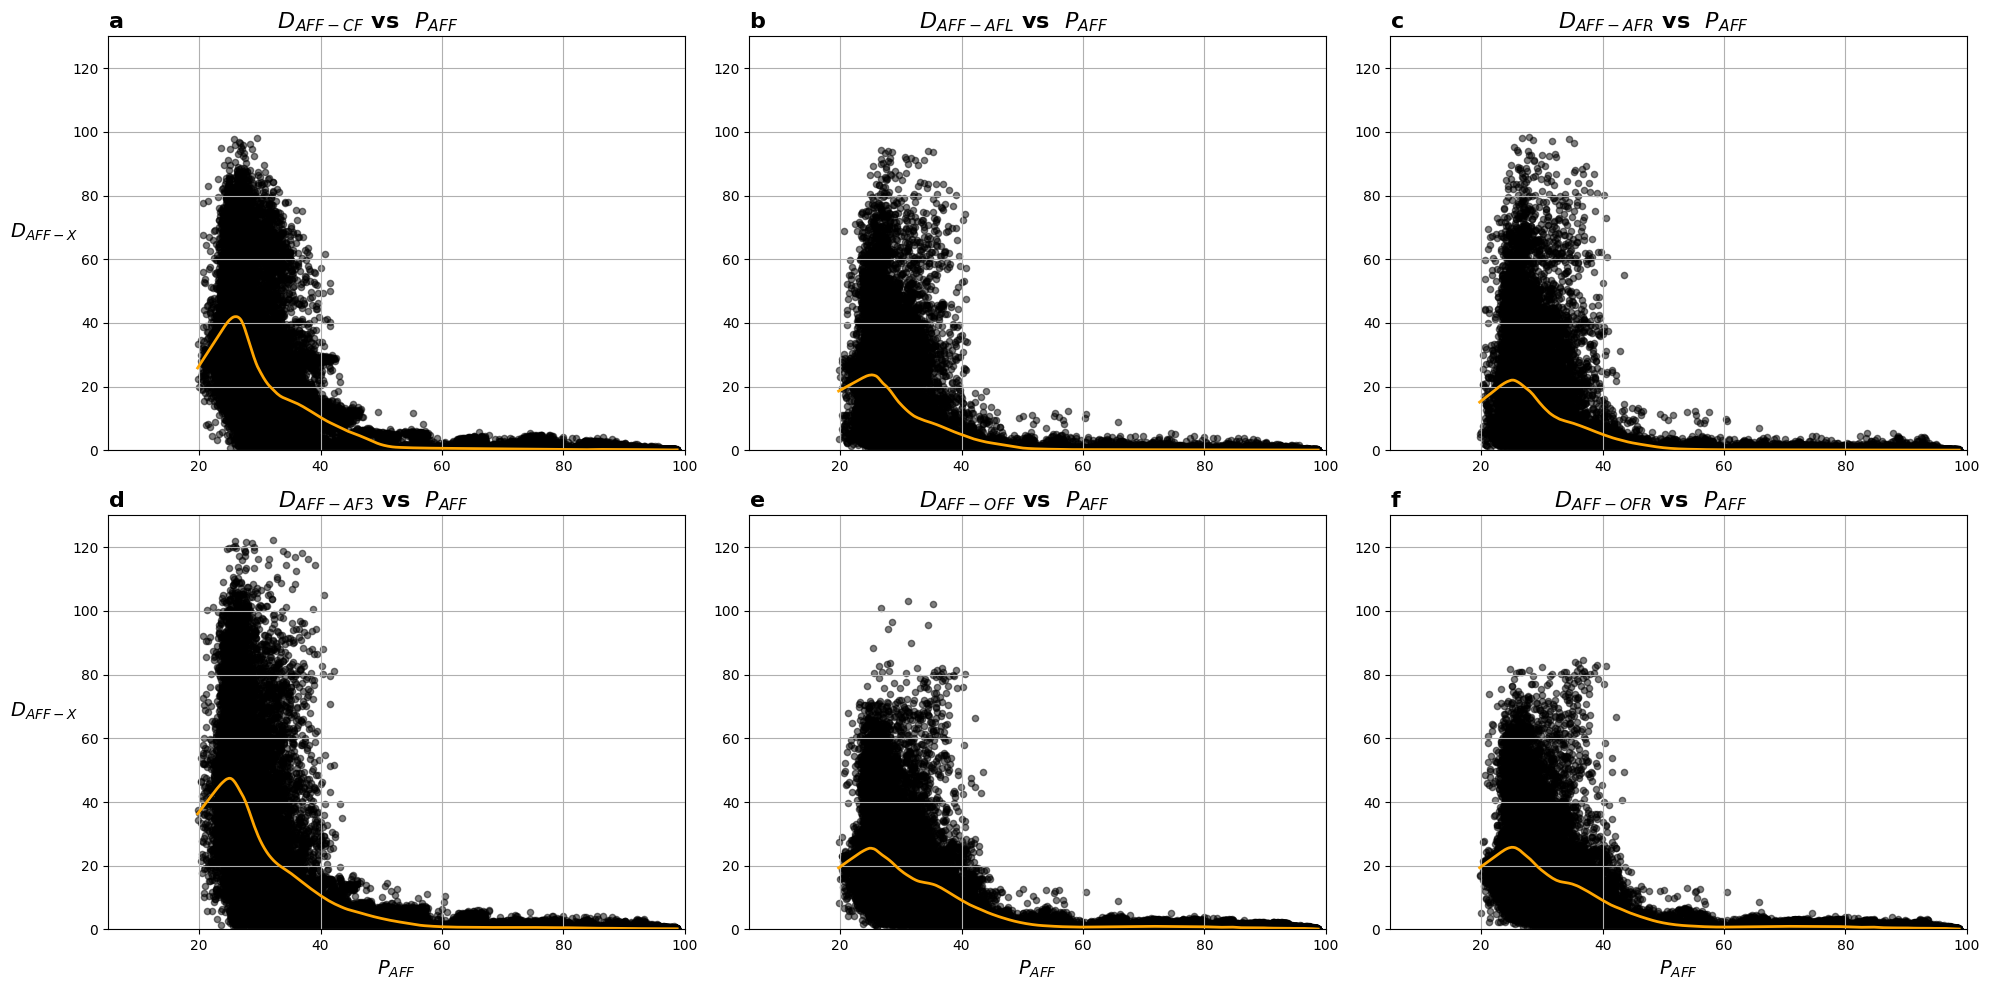

In [ ]:
import pandas as pd

# Path to the Excel file containing the distance matrices for Fig6
excel_path = '/content/drive/MyDrive/AF_OF/DataSource_Fig6.xlsx'

def load_flattened_distance_matrices(excel_path, columnas_a_eliminar):
    """
    Loads all sheets of the Excel file from Fig6, removes categorical columns and flattens each array.
    """
    hojas = pd.read_excel(excel_path, sheet_name=None)  # Carga todas las hojas

    distancias_planas = {}
    for nombre_hoja, df in hojas.items():
        try:
            df_filtrado = df.drop(columns=columnas_a_eliminar)
            distancias_planas[nombre_hoja] = df_filtrado.values.flatten()
        except KeyError:
            print(f"[AVISO] La hoja '{nombre_hoja}' no contiene las columnas esperadas: {columnas_a_eliminar}")

    return distancias_planas

# Columns to be removed before flattening
columnas_no_numericas = ['NIS_Variant', 'Algorithm', 'Type']

# Execute function to obtain all distance vectors
distancias_planas = load_flattened_distance_matrices(excel_path, columnas_no_numericas)

Distances_CF_HC  = distancias_planas.get('Distances_CF_HC')
Distances_AFL_HC = distancias_planas.get('Distances_AFL_HC')
Distances_AFR_HC = distancias_planas.get('Distances_AFR_HC')
Distances_AF3_HC = distancias_planas.get('Distances_AF3_HC')
Distances_OFF_HC = distancias_planas.get('Distances_OFF_HC')
Distances_OFR_HC = distancias_planas.get('Distances_OFR_HC')

def bland_altman_subplot(ax, D, M, title, show_xlabel=False, show_ylabel=False, label_letter=''):
    # Calculation of mean differences and limits of agreement
    mean_diff = np.mean(M)
    LoA = 1.96 * np.std(M)

    smoothed = lowess(M, D, frac=0.03)

    ax.scatter(D, M, color='black', alpha=0.5, s=20)
    ax.plot(smoothed[:, 0], smoothed[:, 1], color='orange', linewidth=2)

    # Labels
    if show_xlabel:
        ax.set_xlabel('${P}_{AFF}$', fontsize=14, fontweight='bold')
    if show_ylabel:
        ax.set_ylabel('${D}_{AFF-X}$', fontsize=14, fontweight='bold', rotation=0, labelpad=20)

    ax.set_title(f"{label_letter} {title}", fontsize=16, fontweight='bold', loc='left')

    ax.set_xlim(5, 100)
    ax.set_ylim(0, 130)
    ax.grid(True)
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.nonparametric.smoothers_lowess import lowess

# Tittles
titles = [
    "                   ${D}_{AFF-CF}$ vs  ${P}_{AFF}$",
    "                   ${D}_{AFF-AFL}$ vs  ${P}_{AFF}$",
    "                   ${D}_{AFF-AFR}$ vs  ${P}_{AFF}$",
    "                   ${D}_{AFF-AF3}$ vs  ${P}_{AFF}$",
    "                   ${D}_{AFF-OFF}$ vs  ${P}_{AFF}$",
    "                   ${D}_{AFF-OFR}$ vs  ${P}_{AFF}$"
]

data_M = [
    Distances_CF_HC,
    Distances_AFL_HC,
    Distances_AFR_HC,
    Distances_AF3_HC,
    Distances_OFF_HC,
    Distances_OFR_HC
]

# Letters of subplots (a) a (f)
letters = ['a', 'b', 'c', 'd', 'e', 'f']

# Create figures
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

for idx, ax in enumerate(axes.flat):
    show_ylabel = idx in [0, 3]
    show_xlabel = idx in [3, 4, 5]

    bland_altman_subplot(
        ax,
        D=pAFF,
        M=data_M[idx],
        title=titles[idx],
        show_xlabel=show_xlabel,
        show_ylabel=show_ylabel,
        label_letter=letters[idx]
    )

plt.tight_layout()
plt.show()


## Figure 7


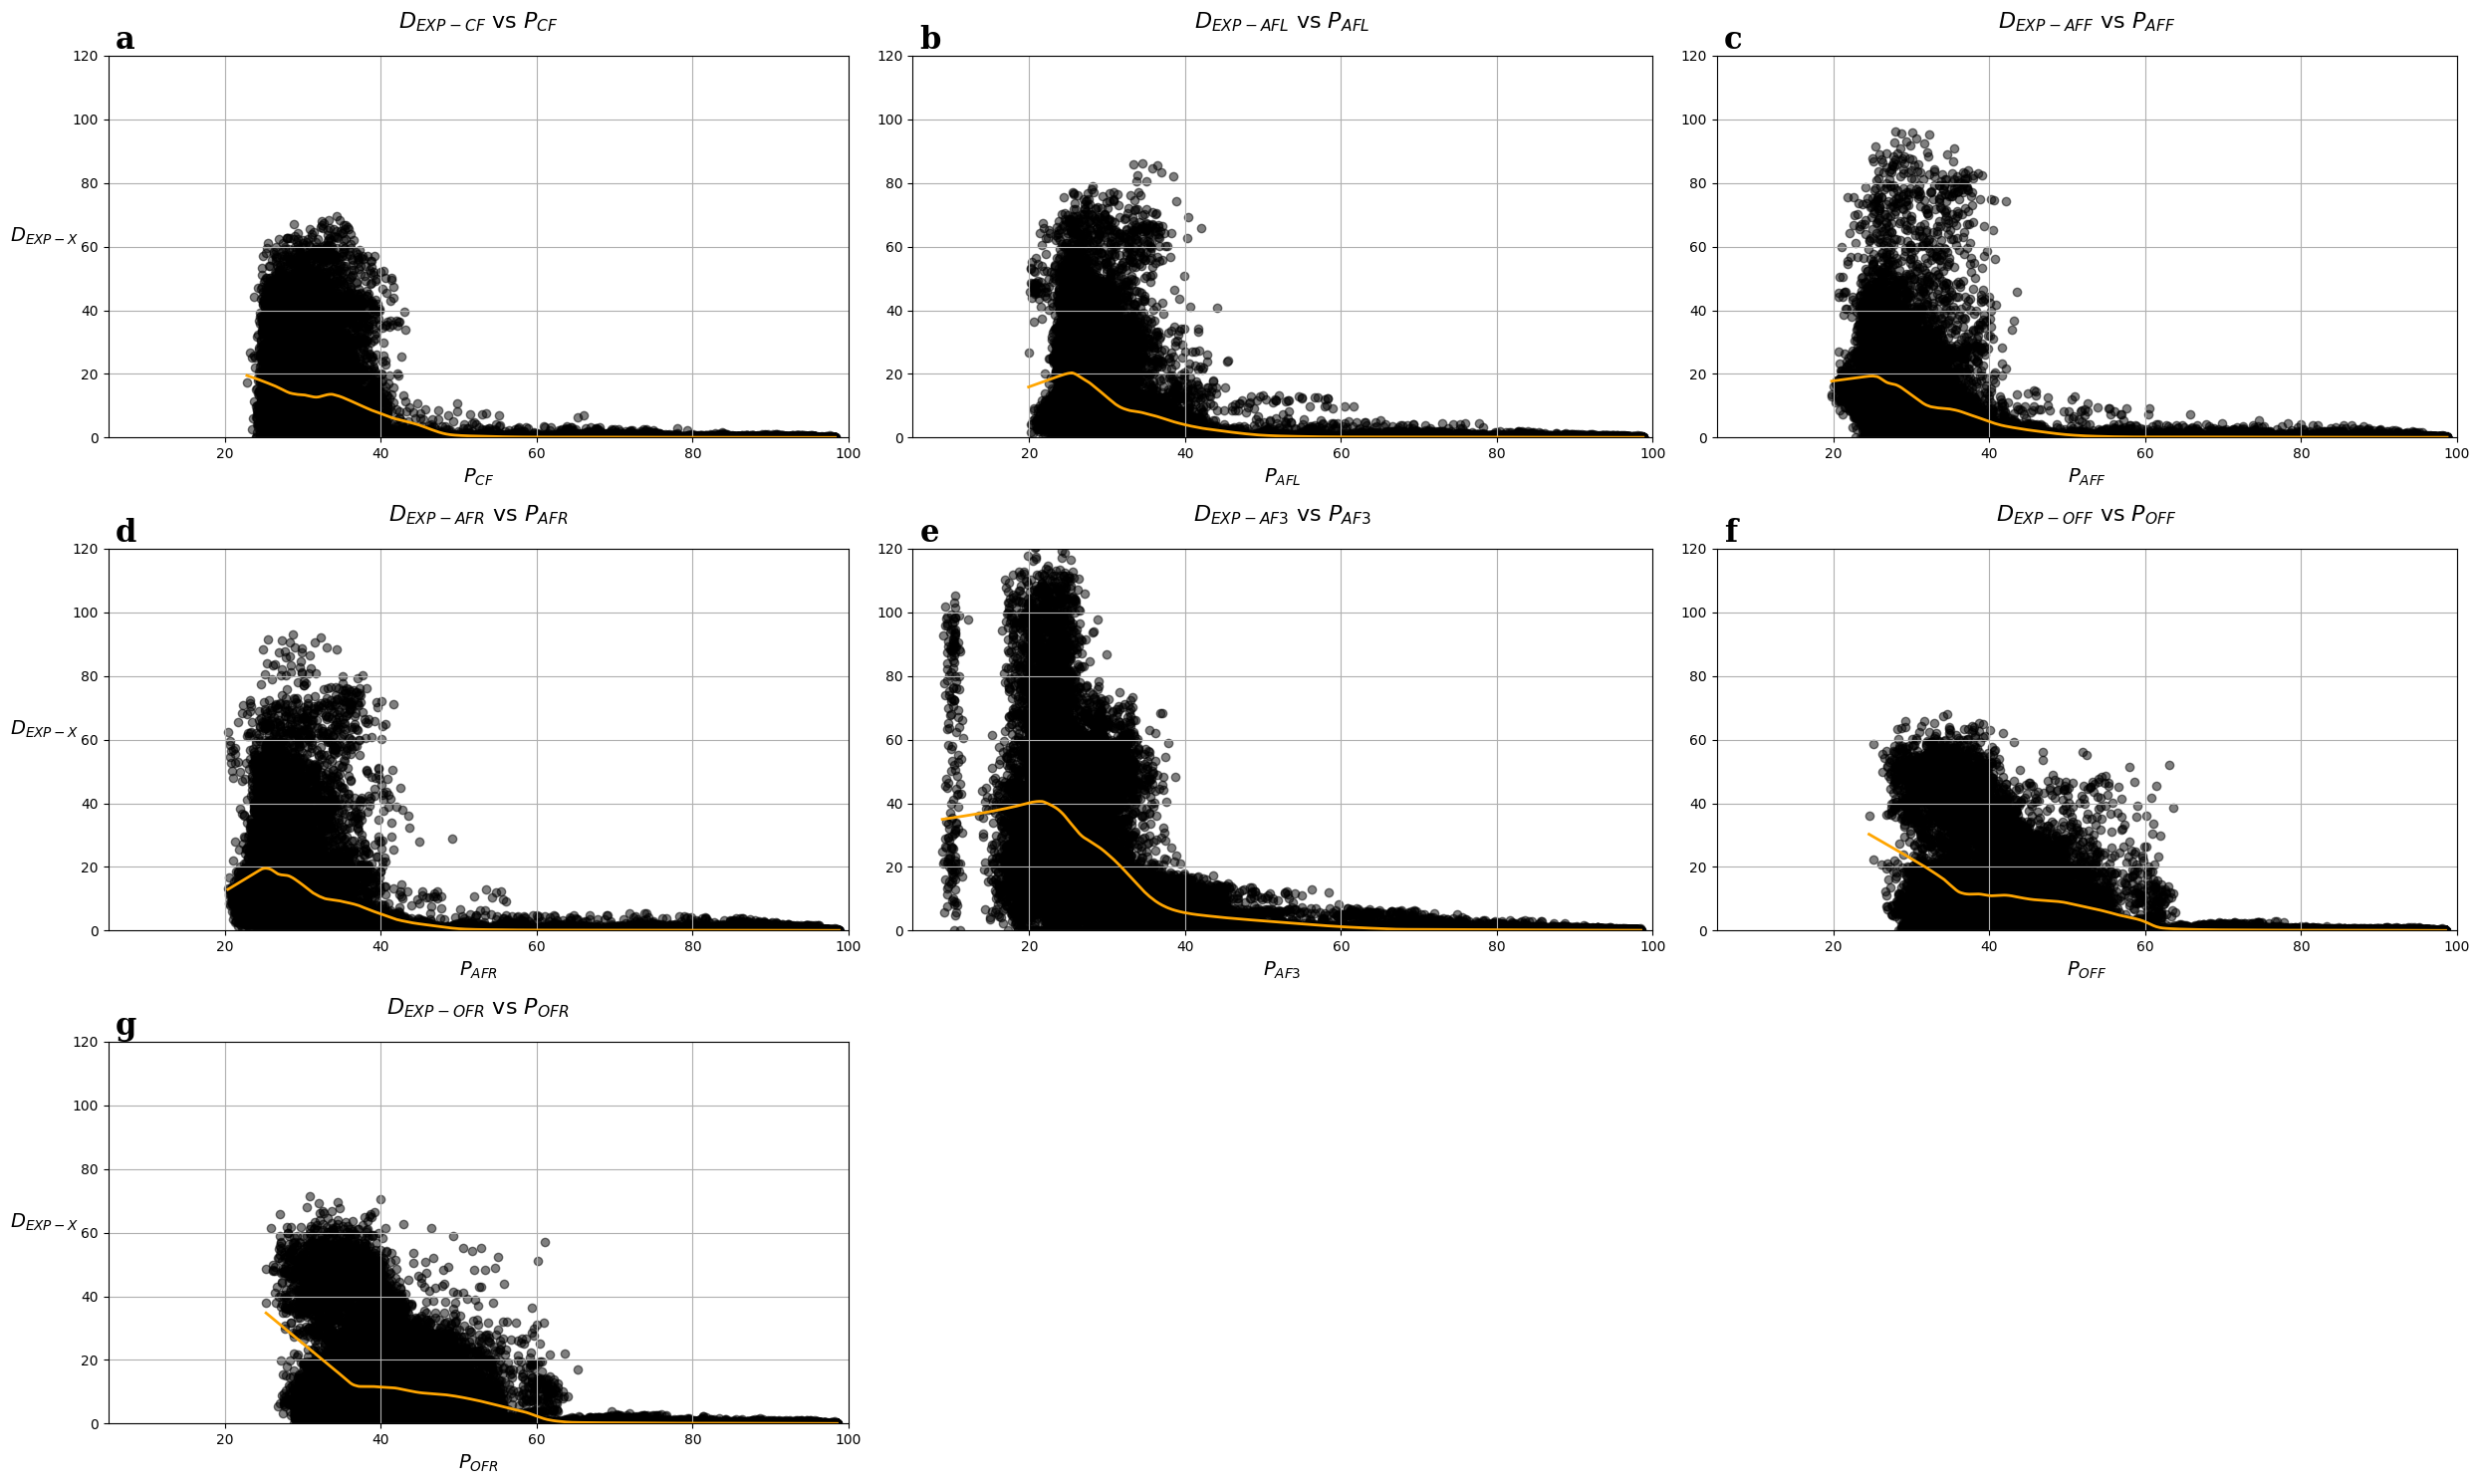

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

# === LOADING OF DISTANCE MATRICES ===
def load_distance_matrix(ruta):
    df = pd.read_csv(ruta)
    if 'Unnamed: 0' in df.columns:
        df.drop(columns='Unnamed: 0', inplace=True)
    return df.values.flatten()

D_WT_CF = load_distance_matrix('/content/drive/MyDrive/AF_OF/NIS/D_WT_CF_NIS.csv')
D_WT_AFL = load_distance_matrix('/content/drive/MyDrive/AF_OF/NIS/D_WT_AFL.csv')
D_WT_AFF = load_distance_matrix('/content/drive/MyDrive/AF_OF/NIS/D_WT_AFF.csv')
D_WT_AFR = load_distance_matrix('/content/drive/MyDrive/AF_OF/NIS/D_WT_AFR.csv')
D_WT_AF3 = load_distance_matrix('/content/drive/MyDrive/AF_OF/NIS/D_WT_AF3.csv')
D_WT_OFF = load_distance_matrix('/content/drive/MyDrive/AF_OF/NIS/D_WT_OFF.csv')
D_WT_OFR = load_distance_matrix('/content/drive/MyDrive/AF_OF/NIS/D_WT_OFR.csv')

# === LOADING AND PROCESSING OF PREDICTION MATRICES ===
def load_prediction(ruta_csv, algoritmo):
    df = pd.read_csv(ruta_csv)
    df = df[df['Algorithm'] == algoritmo]
    df = df.drop(['Type', 'NIS_Variant', 'Algorithm'], axis=1)
    return df.values.flatten()

pCF  = load_prediction('/content/drive/MyDrive/AF_OF/NIS/MatrixP_CF.csv', 'CF')
pAFL = load_prediction('/content/drive/MyDrive/AF_OF/NIS/MatrixP_AFL.csv', 'AFL')
pAFF = load_prediction('/content/drive/MyDrive/AF_OF/NIS/MatrixP_AFF.csv', 'AFL')
pAFR = load_prediction('/content/drive/MyDrive/AF_OF/NIS/MatrixP_AFR.csv', 'AFR')
pAF3 = load_prediction('/content/drive/MyDrive/AF_OF/NIS/MatrixP_AF3.csv', 'AF3')
pOFF = load_prediction('/content/drive/MyDrive/AF_OF/NIS/MatrixP_OFF.csv', 'OFF')
pOFR = load_prediction('/content/drive/MyDrive/AF_OF/NIS/MatrixP_OFR.csv', 'OFR')

# === BLAND-ALTMAN SETTINGS ===
y_min, y_max = 0, 120
x_min, x_max = 5, 100

def bland_altman_subplot(ax, D, M, panel_letter, title, xlabel, ylabel):
    mean_diff = np.mean(D)
    LoA = 1.96 * np.std(D)
    smoothed = lowess(M, D, frac=0.03)

    ax.scatter(D, M, color='black', alpha=0.5, label='Diferencias')
    ax.plot(smoothed[:, 0], smoothed[:, 1], color='orange', linestyle='-', linewidth=2, label='LOESS')
    ax.set_title(title, fontsize=16, fontweight='normal', pad=20)
    ax.text(0.01, 1.08, panel_letter, transform=ax.transAxes, fontsize=22, fontweight='bold', va='top', ha='left', fontfamily='serif')
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14, rotation=0, labelpad=20)
    ax.set_ylim(y_min, y_max)
    ax.set_xlim(x_min, x_max)
    ax.grid(True)

# === PLOT ===
plt.figure(figsize=(25, 15))

# Panels
bland_altman_subplot(plt.subplot(3, 3, 1), pCF, D_WT_CF, 'a', r'${D}_{EXP-CF}$ vs ${P}_{CF}$', r'${P}_{CF}$', r'${D}_{EXP-X}$')
bland_altman_subplot(plt.subplot(3, 3, 2), pAFL, D_WT_AFL, 'b', r'${D}_{EXP-AFL}$ vs ${P}_{AFL}$', r'${P}_{AFL}$', '')
bland_altman_subplot(plt.subplot(3, 3, 3), pAFF, D_WT_AFF, 'c', r'${D}_{EXP-AFF}$ vs ${P}_{AFF}$', r'${P}_{AFF}$', '')
bland_altman_subplot(plt.subplot(3, 3, 4), pAFR, D_WT_AFR, 'd', r'${D}_{EXP-AFR}$ vs ${P}_{AFR}$', r'${P}_{AFR}$', r'${D}_{EXP-X}$')
bland_altman_subplot(plt.subplot(3, 3, 5), pAF3, D_WT_AF3, 'e', r'${D}_{EXP-AF3}$ vs ${P}_{AF3}$', r'${P}_{AF3}$', '')
bland_altman_subplot(plt.subplot(3, 3, 6), pOFF, D_WT_OFF, 'f', r'${D}_{EXP-OFF}$ vs ${P}_{OFF}$', r'${P}_{OFF}$', '')
bland_altman_subplot(plt.subplot(3, 3, 7), pOFR, D_WT_OFR, 'g', r'${D}_{EXP-OFR}$ vs ${P}_{OFR}$', r'${P}_{OFR}$', r'${D}_{EXP-X}$')

plt.tight_layout()
plt.show()
